In [15]:
import json 
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('nbagg')

from vdw_evolve import SuperLattice,  SuperCell
from vdw_evolve.pretty_prints import plot_unit_cell_vectors,plot_lattice_grid,plot_cell
from vdw_evolve.pretty_prints import plot_atom_grid,plot_cell_atoms
from vdw_evolve.benchmark import atom_grid

SAVE_PATH = "Graphene_PbSe2_SC/"
graphene_xyz_path = "../zx_files/graphene.xyz"
pbse_xyz_path = "../zx_files/PdSe2.xyz"



In [2]:
k= 0
cell_path =SAVE_PATH+ "Graphene_PbSe2_"+str(k)+".json"

In [3]:
def super_cell_from_js(path):
    with open(path) as json_file:
        js_data = json.load(json_file)
    parents=[np.array(js_data["cell1"]),np.array(js_data["cell2"])]
    transformation=[np.array(js_data["ta"]),np.array(js_data["strain_tb"])]
    strains=[np.array(js_data["strain"]),np.array(js_data["diagonal_strain"])]
    s_cell = SuperCell(parents,transformation,strains)
    return s_cell

In [7]:
s_cell = super_cell_from_js(cell_path)
super_lattice = SuperLattice(s_cell, graphene_xyz_path, pbse_xyz_path)

graphene_cell=s_cell.parents[0]
pbse_cell=s_cell.parents[1]

molec: {'C1': {'x': -2.26645703572323e-18, 'y': -1.8616630956906283e-38, 'z': -1.8616630956906283e-38}, 'C2': {'x': 0.6666666674727976, 'y': 0.3333333351204249, 'z': 0.3333333351204249}}
[-5.59134951e-18 -0.00000000e+00]
[1.64466667 0.        ]
new_m: {'C1': array([-5.59134951e-18, -3.97741467e-38, -1.86166310e-38]), 'C2': array([1.64466667, 0.71216156, 0.33333334])}
molec: {'Pd1': {'x': 0.4999999978360108, 'y': 1.791254318456476e-09, 'z': 1.791254318456476e-09}, 'Pd2': {'x': -1.8237131255310393e-09, 'y': 0.4999999973580771, 'z': 0.4999999973580771}, 'S1': {'x': 0.10464945368821875, 'y': 0.1114806220085412, 'z': 0.1114806220085412}, 'S2': {'x': 0.6046494606427952, 'y': 0.3885193753495359, 'z': 0.3885193753495359}, 'S3': {'x': 0.8953505401600896, 'y': 0.8885193727076129, 'z': 0.8885193727076129}, 'S4': {'x': 0.3953505332055133, 'y': 0.6114806283228899, 'z': 0.6114806283228899}}
[2.87499999 0.        ]
[-1.04863505e-08 -0.00000000e+00]
[0.60173436 0.        ]
[3.4767344 0.       ]
[5.148

In [8]:
print(s_cell.description_txt())


=== 
 cell :
[[-12.335      -12.57695401]
 [ 22.203       28.19337737]]

cell1 :
[[2.467      1.2335    ]
 [0.         2.13648467]]

cell2 :
[[5.75 0.  ]
 [0.   5.92]]

ta :
[[-5 -3]
 [ 9  8]]

strain_tb :
[[-2.14521739 -2.12448548]
 [ 3.8613913   4.76239483]]

det_ta :
-13.000000000000005

strain :
[[ 1.11407253  0.02073192]
 [-0.12868861  0.90100352]]

tb :
[[-2. -2.]
 [ 4.  5.]]

diagonal_strain :
[[1.05       0.        ]
 [0.         0.95847352]]

diagonal_strain_tb: :
[[-2.04306418 -2.0233195 ]
 [ 4.02868854  4.96872862]]





Nr atoms  in annealing_lattice: 27


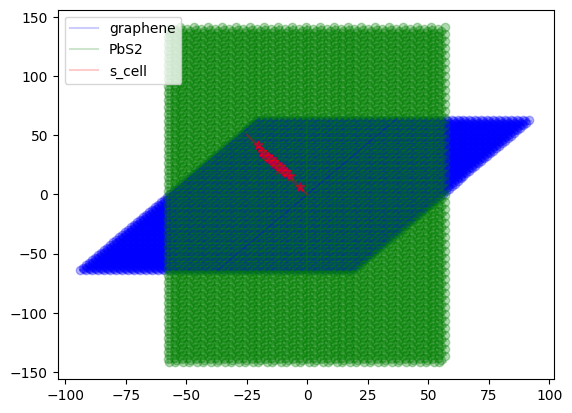

In [9]:
print("\nNr atoms  in annealing_lattice:", super_lattice.nr_atoms)

f, ax = plt.subplots()

# Plot vectors:
g_a1,g_a2= plot_unit_cell_vectors(ax, graphene_cell, alpha=0.3, color = 'b')
p_a1,p_a2= plot_unit_cell_vectors(ax, pbse_cell, alpha=0.3, color= 'g')
s_a1,s_a2= plot_unit_cell_vectors(ax, super_lattice.s_cell, alpha=0.3, color= 'r')

# Plot grid: 
graphene_grid = plot_lattice_grid(ax, super_lattice, label="graphene", parent =0, color='b', alpha =0.2)
pbse_grid = plot_lattice_grid(ax, super_lattice, label="PbS2", parent =1, color='g', alpha =0.2)

# Super cell:
super_cell = plot_cell(ax, super_lattice.s_cell, label="s_cell")

# Atoms:
graphene_atoms = plot_atom_grid(ax, super_lattice, parent = 0, color='b', alpha =0.3)
pbse_atoms = plot_atom_grid(ax, super_lattice, parent = 1, color='g', alpha =0.3)

# Atoms in Super cell:
plot_cell_atoms(super_lattice.s_lattice, marker="*", alpha=0.3, color="r")

plt.legend()
plt.show()

In [ ]:
ag=atom_grid(lattice= super_lattice.s_lattice, cell_x=super_lattice.s_cell, a1s=10, a2s=4)

In [ ]:
f, ax = plt.subplots()

# Atoms:
graphene_atoms = plot_atom_grid(ax, super_lattice, parent = 0, color='b', alpha =0.3)
pbse_atoms = plot_atom_grid(ax, super_lattice, parent = 1, color='g', alpha =0.3)
# Super cell:
super_cell = plot_cell(ax, super_lattice.s_cell, label="s_cell")
# Atoms in Super cell:
plot_cell_atoms(super_lattice.s_lattice, marker="*", alpha=0.3, color="r")

plot_cell_atoms(ag,color="m",marker="2",alpha=0.3)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>